# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

#! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

zsh:1: command not found: wget


In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [7]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,747,80,43,68,123,53,7,150,46,19,147,169,327,176,81,7,14,179,184
1,594,83,40,59,116,53,7,132,52,18,137,145,250,157,84,12,6,177,183
2,823,105,54,105,213,67,10,200,33,23,163,214,597,214,68,10,20,190,198
3,172,94,45,81,166,67,9,145,46,19,147,164,313,179,66,11,14,194,202
4,238,100,55,101,189,57,10,222,30,25,177,225,731,211,71,7,17,188,197
5,66,81,43,68,125,57,8,149,46,19,146,169,323,172,83,6,18,179,184
6,106,99,46,105,209,64,11,197,34,23,152,212,575,159,65,0,33,194,205
7,825,86,39,84,149,57,8,156,43,20,133,185,358,157,74,0,23,183,190
8,132,97,42,101,186,59,9,186,36,22,138,208,511,168,67,7,41,194,206
9,736,102,51,104,217,67,10,204,32,23,162,220,621,195,68,3,19,188,197


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,423.790528,93.393443,44.783242,81.661202,168.245902,61.557377,8.497268,168.251366,41.098361,20.542805,147.790528,187.987250,437.225865,174.615665,72.438980,6.236794,12.491803,188.857923,195.464481
std,246.431684,7.888944,6.236695,15.678277,33.001156,7.691526,4.648453,33.512753,7.859474,2.605526,14.597202,31.438647,178.636605,33.072854,7.306033,4.744035,8.925197,6.162774,7.503838
min,0.000000,76.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,213.000000,88.000000,40.000000,70.000000,141.000000,57.000000,6.000000,146.000000,33.000000,19.000000,137.000000,167.000000,316.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,424.000000,92.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,365.000000,174.000000,71.000000,5.000000,11.000000,188.000000,196.000000
75%,641.000000,99.000000,49.000000,98.000000,194.000000,65.000000,10.000000,197.000000,46.000000,23.000000,159.000000,216.000000,583.000000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,112.000000,322.000000,133.000000,55.000000,265.000000,61.000000,29.000000,188.000000,287.000000,1018.000000,268.000000,127.000000,22.000000,41.000000,204.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [77]:
set(y_train), set(y_test)

({'bus', 'opel', 'saab', 'van'}, {'bus', 'opel', 'saab', 'van'})

In [78]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#skaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#one-hot-encoding
label = LabelEncoder()
label.fit(y_train)
y_train = label.transform(y_train)
y_test = label.transform(y_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [79]:
y_train

array([3, 3, 1, 0, 3, 2, 1, 1, 2, 2, 3, 3, 1, 0, 0, 0, 2, 0, 3, 0, 3, 1,
       1, 2, 1, 3, 2, 1, 1, 1, 0, 2, 0, 1, 3, 2, 0, 3, 3, 3, 1, 2, 2, 2,
       1, 1, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 3, 0, 1, 1, 3,
       2, 3, 2, 3, 3, 0, 2, 0, 1, 3, 1, 3, 3, 2, 1, 2, 3, 1, 1, 3, 1, 1,
       0, 0, 2, 1, 3, 2, 0, 1, 0, 1, 0, 2, 3, 1, 3, 0, 0, 3, 0, 2, 1, 1,
       2, 0, 2, 2, 0, 3, 2, 0, 3, 3, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 1, 2,
       0, 0, 2, 2, 0, 3, 1, 3, 3, 1, 1, 0, 2, 1, 3, 3, 0, 2, 3, 0, 2, 3,
       2, 1, 0, 1, 2, 0, 3, 2, 1, 0, 1, 3, 3, 3, 2, 1, 1, 2, 2, 3, 3, 3,
       0, 1, 0, 1, 0, 3, 3, 0, 0, 2, 2, 1, 0, 1, 3, 0, 1, 1, 0, 2, 0, 2,
       2, 2, 1, 2, 3, 1, 1, 1, 0, 2, 2, 1, 1, 0, 3, 0, 3, 3, 3, 2, 1, 1,
       0, 0, 3, 0, 1, 0, 0, 1, 2, 3, 2, 3, 1, 3, 1, 1, 3, 0, 1, 1, 1, 2,
       0, 1, 0, 0, 3, 0, 2, 3, 3, 0, 0, 3, 0, 1, 1, 0, 3, 2, 0, 2, 1, 0,
       3, 2, 0, 0, 2, 3, 0, 3, 0, 3, 1, 3, 0, 0, 1, 2, 1, 1, 3, 2, 1, 0,
       3, 1, 0, 1, 0, 2, 2, 1, 3, 0, 1, 3, 0, 2, 3,

In [80]:
### YOUR CODE HERE
import warnings
warnings.filterwarnings('ignore')

grid = GridSearchCV(LogisticRegression(),
                   {'penalty': ['l2', 'l1'],
                    'C': [1e-5, 1e-4, 1e-3, 1, 10, 100],
                    'solver': ['saga'],
                   'max_iter': [500],
                   'multi_class': ['multinomial']})
grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 1, 10, 100],
                         'max_iter': [500], 'multi_class': ['multinomial'],
                         'penalty': ['l2', 'l1'], 'solver': ['saga']})

In [81]:
grid.best_params_, grid.best_score_

({'C': 100,
  'max_iter': 500,
  'multi_class': 'multinomial',
  'penalty': 'l2',
  'solver': 'saga'},
 0.7704587155963302)

In [82]:
from sklearn.metrics import accuracy_score, f1_score

In [105]:
print(f'accuracy: {accuracy_score(y_test, grid.predict(X_test))}')
print('f1_score: {}'.format(f1_score(y_test, grid.predict(X_test), average=None)))

accuracy: 0.8013468013468014
f1_score: [0.93333333 0.65771812 0.68789809 0.94202899]


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

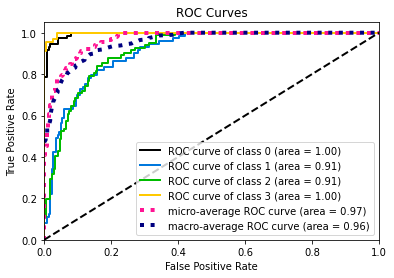

In [107]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

from scikitplot.metrics import plot_roc

plot_roc(y_test, grid.predict_proba(X_test))

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [ ]:
### YOUR CODE HERE

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
### YOUR CODE HERE

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
### YOUR CODE HERE

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE